In [9]:
from google.colab import files
data=files.upload()

Saving customers.csv to customers.csv


In [29]:
ls

cust.csv  customers.csv  products.csv  sample_data/  transactions.csv


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:

customers_list = ['custno','firstname','lastname','gender','age','profession','contactNo','emailId','city','state','isActive','createdDate','UpdatedDate']
products_list = ['productno','productName','Description','isActive','createdDate','UpdatedDate']
transactions_list = ['txnno','txndate','custno','amount','productno','spendby']

data1=pd.read_csv('cust.csv',header=None,names=customers_list)
data2=pd.read_csv('transactions.csv',header=None,names=transactions_list)
data3=pd.read_csv('products.csv',header=None,names=products_list)

**Usecase-1 Load all three csv datasets in Pandas Data frames and display first 5 records.**

In [36]:
# data1.head()
# data1.set_index('custno',inplace=True)
data1.head(5)

,custno,firstname,lastname,gender,age,profession,contactNo,emailId,city,state,isActive,createdDate,UpdatedDate
0,1,Leslie,Bass,F,27,B,37307,endslost@everyma1l.org,Gibson,Dellwood,Y,9/21/2017 12:38,10/18/2017 12:12
1,2,Judy,Burks,M,53,S,84759,rfleming@hotma1l.co.uk,Suwanee,Trabue,Y,5/22/2017 5:29,10/18/2017 12:12
2,3,Marsha,Doyle,F,48,B,80932,arethe53@ma1lbox.net,Perry,Moxadarla,Y,9/3/2017 12:11,10/18/2017 12:12
3,4,Alexis,Battle,M,27,S,71701,ofcame@ma1lbox.org,Morven,Dennis,Y,2/16/2017 4:05,10/18/2017 12:12
4,5,Martha,Combs,F,49,B,83947,camedied@everyma1l.us,Ocilla,Greenwood,Y,5/15/2017 7:34,10/18/2017 12:12


In [37]:
# data2.head()
# data2.set_index('txnno',inplace=True)
data2.head(5)

,txnno,txndate,custno,amount,productno,spendby
0,1,2017-10-18 12:31:45,923,2559,376,Card
1,2,2017-10-18 12:31:45,219,1706,151,Card
2,3,2017-10-18 12:31:45,927,3462,707,Cash
3,4,2017-10-18 12:31:45,806,865,539,Card
4,5,2017-10-18 12:31:45,958,2494,25,Card


In [38]:
# data3.head()
# data3.set_index('productno',inplace=True)
data3.head(5)

,productno,productName,Description,isActive,createdDate,UpdatedDate
0,1,Product1,pgqorighfa,Y,2017-04-03 07:58:55,2017-10-18 12:12:38
1,2,Product2,lmndaaweth,Y,2017-09-21 12:38:31,2017-10-18 12:12:38
2,3,Product3,urifeubrhh,Y,2017-09-08 10:32:12,2017-10-18 12:12:38
3,4,Product4,rlpcjxfarp,Y,2017-05-22 05:29:27,2017-10-18 12:12:38
4,5,Product5,hzcpozsgfc,Y,2017-02-02 08:40:29,2017-10-18 12:12:38


**Usecase-2 Display only those customers from CSV_s1, who purchased more than 3 products**

In [60]:
merged = data1.merge(data2, on='custno', how='inner')
merged.head(3)

,custno,firstname,lastname,gender,age,profession,contactNo,emailId,city,state,isActive,createdDate,UpdatedDate,txnno,txndate,amount,productno,spendby
0,2,Judy,Burks,M,53,S,84759,rfleming@hotma1l.co.uk,Suwanee,Trabue,Y,5/22/2017 5:29,10/18/2017 12:12,423,2017-10-18 12:31:46,4245,136,Cash
1,2,Judy,Burks,M,53,S,84759,rfleming@hotma1l.co.uk,Suwanee,Trabue,Y,5/22/2017 5:29,10/18/2017 12:12,973,2017-10-18 12:31:46,4717,842,Card
2,3,Marsha,Doyle,F,48,B,80932,arethe53@ma1lbox.net,Perry,Moxadarla,Y,9/3/2017 12:11,10/18/2017 12:12,146,2017-10-18 12:31:45,1730,345,Card


In [61]:
a=merged['custno'].value_counts()
b=a[a.values>3]
b

241    5
391    5
558    4
709    4
187    4
167    4
537    4
237    4
86     4
828    4
989    4
578    4
735    4
331    4
4      4
356    4
321    4
326    4
753    4
Name: custno, dtype: int64

In [ ]:
data1.set_index('custno',inplace=True)

In [65]:
#customer who purchase more than 3 products
data1.loc[b.index,['firstname','lastname','gender','age','profession']]

,firstname,lastname,gender,age,profession
241,Derrick,Pearson,F,33,B
391,Keith,Church,F,19,B
558,Lois,Todd,M,58,S
709,Kyle,Haynes,F,44,B
187,Alan,Anthony,F,50,B
167,Alice,Blake,F,58,B
537,Jake,Bush,F,23,B
237,Dawn,West,F,26,B
86,Bonnie,McCall,M,37,S
828,Katrina,Barber,M,47,S


**Usecase-3 Display top 5 most demanded products from CSV_s1**

In [47]:
merged23 = data2.merge(data3, on='productno', how='inner')
merged23

,txnno,txndate,custno,amount,productno,spendby,productName,Description,isActive,createdDate,UpdatedDate
0,1,2017-10-18 12:31:45,923,2559,376,Card,Product376,yrvkpocxka,Y,2017-09-06 05:06:57,2017-10-18 12:12:38
1,2,2017-10-18 12:31:45,219,1706,151,Card,Product151,fvmygtysjn,Y,2017-07-24 10:18:43,2017-10-18 12:12:38
2,163,2017-10-18 12:31:45,265,3310,151,Card,Product151,fvmygtysjn,Y,2017-07-24 10:18:43,2017-10-18 12:12:38
3,3,2017-10-18 12:31:45,927,3462,707,Cash,Product707,ahvvpkfuwo,Y,2017-08-22 06:07:24,2017-10-18 12:12:39
4,566,2017-10-18 12:31:46,767,2436,707,Card,Product707,ahvvpkfuwo,Y,2017-08-22 06:07:24,2017-10-18 12:12:39
...,...,...,...,...,...,...,...,...,...,...,...
995,988,2017-10-18 12:31:46,391,1273,193,Card,Product193,beivctmvqt,Y,2017-03-03 03:52:17,2017-10-18 12:12:38
996,990,2017-10-18 12:31:46,4,1892,548,Cash,Product548,wtxnnxgbia,Y,2017-01-22 12:24:15,2017-10-18 12:12:39
997,992,2017-10-18 12:31:46,382,4176,75,Card,Product75,bloajtdkam,N,2017-07-18 08:04:57,2017-10-18 12:12:38
998,993,2017-10-18 12:31:46,301,2570,407,Cash,Product407,lckmbnarws,Y,2017-06-10 02:05:57,2017-10-18 12:12:38


In [46]:
a=merged23['productno'].value_counts().head()
a

82     5
427    5
900    5
768    5
849    4
Name: productno, dtype: int64

In [49]:
new=data3.set_index('productno')
new
new.loc[a.index]
#most demanded products

,productName,Description,isActive,createdDate,UpdatedDate
82,Product82,ignxxzodmc,Y,2017-09-24 02:57:26,2017-10-18 12:12:38
427,Product427,rnqzbzweys,Y,2017-09-14 10:44:57,2017-10-18 12:12:38
900,Product900,ouoolyahlh,N,2017-01-10 12:35:30,2017-10-18 12:12:39
768,Product768,hvfbltpjun,Y,2017-01-27 11:45:21,2017-10-18 12:12:39
849,Product849,qevomhstmc,Y,2017-06-12 09:06:06,2017-10-18 12:12:39


**Usecase-4 Display top 5 transactions amount from CSV_s1**

In [72]:
transa_sorted=data2.sort_values(by='amount',ascending=False).head()
transa_sorted

,txnno,txndate,custno,amount,productno,spendby
556,557,2017-10-18 12:31:46,670,4996,509,Card
305,306,2017-10-18 12:31:46,448,4992,427,Cash
574,575,2017-10-18 12:31:46,305,4981,549,Card
531,532,2017-10-18 12:31:46,230,4980,658,Card
232,233,2017-10-18 12:31:45,287,4966,685,Card


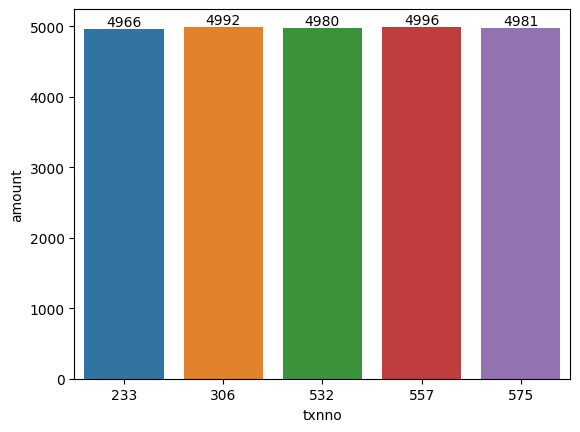

In [76]:
barr=sns.barplot(x='txnno',y='amount',data=transa_sorted)
for i in barr.containers:
  barr.bar_label(i,)

**Usecase-5 Display distinct professions from CSV_s1**

In [70]:
x=data1['profession'].value_counts()
x

B    500
S    500
Name: profession, dtype: int64

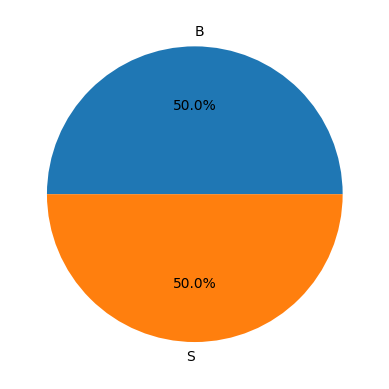

In [71]:
plt.pie(x.values,labels=x.index,autopct='%0.1f%%')
plt.show()

**Usecase-6 Display highest age in CSV_s1 customer’s dataset**

In [ ]:
# data1['age'].sort_values(ascending=False).head(1)
data1['age'].max()

64

***Usecase-7 Display custno, gender, age, profession, contactno, productno, productName,txndate, spendby, amount from CSV_s1 for custno = 923 ***

In [ ]:
a = data1.merge(data2, on='custno', how='inner')
b=a.merge(data3, on='productno', how='inner')
b.set_index('custno',inplace=True)
b.loc[923,[ 'gender', 'age', 'profession', 'contactNo', 'productno', 'productName','txndate', 'spendby', 'amount']]

,gender,age,profession,contactNo,productno,productName,txndate,spendby,amount
custno,,,,,,,,,
923,F,46,B,25436,113,Product113,2017-10-18 12:31:46,Card,2303
923,F,46,B,25436,644,Product644,2017-10-18 12:31:46,Cash,4553
923,F,46,B,25436,376,Product376,2017-10-18 12:31:45,Card,2559


**Usecase-8 Load all three PSV (pipe separated values) dataset in Pandas Data frames and display first 5 records.**

In [ ]:
 from google.colab import files
data=files.upload()

Saving customers.txt to customers.txt
Saving products.txt to products.txt
Saving transactions.txt to transactions.txt


In [ ]:
data1=pd.read_csv('customers.txt', sep='|')
data2=pd.read_csv('products.txt', sep='|')
data3=pd.read_csv('transactions.txt', sep='|')

In [ ]:
data1.head()

,1,Leslie,Bass,F,27,B,37307,endslost@everyma1l.org,Gibson,Dellwood,Y,2017-09-21 12:38:22,2017-10-18 12:12:28
0,2,Judy,Burks,M,53,S,84759,rfleming@hotma1l.co.uk,Suwanee,Trabue,Y,2017-05-22 05:29:22,2017-10-18 12:12:28
1,3,Marsha,Doyle,F,48,B,80932,arethe53@ma1lbox.net,Perry,Moxadarla,Y,2017-09-03 12:11:29,2017-10-18 12:12:28
2,4,Alexis,Battle,M,27,S,71701,ofcame@ma1lbox.org,Morven,Dennis,Y,2017-02-16 04:05:35,2017-10-18 12:12:28
3,5,Martha,Combs,F,49,B,83947,camedied@everyma1l.us,Ocilla,Greenwood,Y,2017-05-15 07:34:35,2017-10-18 12:12:28
4,6,Marilyn,Nguyen,M,57,S,72274,discoveredlist82@gma1l.org,Byron,Wetsell,Y,2017-05-12 06:18:16,2017-10-18 12:12:28


**Usecase-9 Load all three JSON datasets in Pandas Data frames and display first 5 records.**

In [78]:
 from google.colab import files
data=files.upload()

Saving customers.json to customers.json


In [80]:
data1=pd.read_json('customers.json', lines=True)
data1

,custno,firstname,lastname,gender,age,profession,contactNo,emailId,city,state,isActive,createdDate,UpdatedDate
0,1,Dai,Noble,2,53,Human Resources,1644101928099,eu.lacus.Quisque@loremac.com,Berlin,Berlin,1,2017-03-01,2018-08-25
1,2,Kay,Wise,2,26,Public Relations,1674031917099,ridiculus@Sednunc.ca,Oldenzaal,Overijssel,2,2017-04-10,2018-08-30
2,3,Amir,Pace,1,43,Customer Relations,1636050509999,quam.Pellentesque@erat.edu,Cobourg,Ontario,2,2017-03-04,2018-09-18
3,4,Sebastian,Lopez,2,32,Customer Relations,1666010108899,magna@venenatis.net,Te Awamutu,NI,1,2016-12-17,2018-09-12
4,5,Brian,Maddox,1,40,Quality Assurance,1646080399299,ac.facilisis@Duis.com,Greater Sudbury,Ontario,2,2017-02-18,2018-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Tanner,Webster,1,29,Accounting,1651102557499,Maecenas.libero@Namacnulla.net,Gloucester,Ontario,2,2016-12-02,2018-06-20
96,97,Tatiana,Gates,2,54,Advertising,1614113098499,cursus@loremsit.net,Bassano in Teverina,LAZ,1,2017-03-09,2018-10-05
97,98,Baxter,Valenzuela,1,43,Asset Management,1673011459999,Donec.tincidunt.Donec@musProinvel.ca,Ham-sur-Sambre,Namen,2,2017-02-18,2018-02-19
98,99,Chadwick,Mcclure,2,42,Payroll,1683050699999,viverra@aarcuSed.org,Dolembreux,Luik,1,2017-05-02,2017-08-08


**Usecase-10 Load all three XML datasets in Pandas Data frames and display first 5 records.**

In [82]:
 from google.colab import files
data=files.upload()

Saving customers.xml to customers.xml


In [83]:
data1=pd.read_xml('customers.xml')
data1

,custno,firstname,lastname,gender,age,profession,contactNo,emailId,city,state,isActive,createdDate,UpdatedDate
0,1,Teegan,Hubbard,2,33,Human Resources,1681121691699,nibh.Quisque@placerat.com,Galashiels,Selkirkshire,1,2016-12-07,2018-09-05
1,2,Deacon,Briggs,2,54,Customer Relations,1631082682999,facilisis.eget@Nullaeu.com,Lens-Saint-Remy,LU,1,2017-04-26,2018-06-04
2,3,Mallory,Shelton,1,57,Customer Relations,1627011572699,Curabitur.ut@Nullatempor.edu,North Shore,NI,1,2017-01-02,2018-08-01
3,4,Quinn,Clements,2,43,Media Relations,1618122268999,metus.Vivamus.euismod@urna.edu,Heredia,H,1,2017-02-11,2018-07-18
4,5,Arthur,Hurst,2,41,Tech Support,1681021022799,in@commodoipsum.org,San Diego,Cartago,2,2017-03-30,2018-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Harriet,Moreno,1,33,Legal Department,1699083081799,adipiscing.lobortis.risus@est.edu,Mogliano,Marche,1,2017-03-16,2017-11-15
96,97,Nell,Sparks,1,63,Asset Management,1676091596299,ullamcorper.Duis.at@ultricesDuisvolutpat.com,Asnières-sur-Seine,IL,2,2017-03-15,2017-07-09
97,98,Ashely,Lynn,1,30,Customer Service,1648120950499,faucibus.leo@egestasadui.co.uk,Redlands,QLD,2,2017-03-18,2017-11-22
98,99,Emily,Williams,2,30,Finances,1673100901599,sit.amet@miloremvehicula.edu,Berwick-upon-Tweed,Northumberland,2,2016-12-23,2017-11-19
